In [4]:
import pandas as pd
import numpy as np
from pybnesian import hc, CLGNetworkType
#from drawdata import draw_scatter
import matplotlib.pyplot as plt
import math

from pymoo.core.problem import ElementwiseProblem

from pymoo.optimize import minimize

from bayesace.algorithms.face import face_algorithm
from bayesace.utils import *
from bayesace.algorithms.bayesace import *

from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv("toy-3class.csv")
df["class"] = df["z"].astype('category')
#df["z"] = df["z"].astype('category')
df = df.drop("z", axis = 1 )

feature_columns = [i for i in df.columns if i != "class"]
df[feature_columns] = StandardScaler().fit_transform(df[feature_columns].values)



learned = hc(df, bn_type = CLGNetworkType(), operators = ["arcs"], score = "validated-lik")
learned.num_arcs()

learned.fit(df)

In [6]:
print(df.iloc[[0]])

          x         y class
0 -0.646586  1.368735     a


In [13]:
n_vertex = 0
x_og = df.iloc[[0]]
res = bayes_ace(learned, x_og, n_vertex = n_vertex, penalty=1)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      200 |      1 |  0.000000E+00 |  0.5197600400 |             - |             -
     2 |      400 |      1 |  0.000000E+00 |  0.0009168165 |  0.1355759299 |         ideal
     3 |      600 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     4 |      800 |      1 |  0.000000E+00 |  0.000000E+00 |  0.0351542927 |         ideal
     5 |     1000 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     6 |     1200 |      1 |  0.000000E+00 |  0.000000E+00 |  0.0071747766 |         ideal
     7 |     1400 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     8 |     1600 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     9 |     1800 |      1 |  0.000000E+00 |  0.000000E+00 |  0.0000229312 |             f
    10 |     2000 |      1 |  0.000000E+00 |  0.000000E+00 |  0.0000229312 |             f

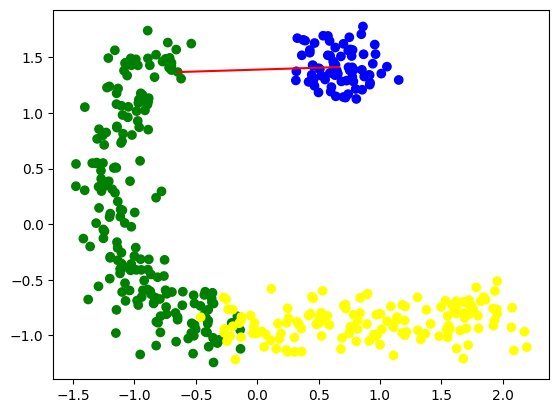

In [14]:
x_1 = x_og.drop("class",axis = 1)
df_vertex = pd.DataFrame(columns = x_1.columns, data=np.resize(res,new_shape=(n_vertex+1, len(x_1.columns))))
df_vertex = pd.concat([x_og, df_vertex])
to_plot = df.drop("class", axis = 1)
colours = df["class"].to_numpy()
colours[colours == "a"] = "green"
colours[colours == "b"] = "yellow"
colours[colours == "c"] = "blue"
plt.scatter(to_plot["x"],to_plot["y"], color = colours)
plt.plot(df_vertex.x,df_vertex.y,color = "red")
plt.show()

In [11]:
res

array([[ 1.24236263, -0.89323197],
       [ 1.01523577, -0.7942697 ],
       [ 1.15340315, -0.8592404 ],
       [ 1.19201134, -0.75568095],
       [ 0.79210835, -0.90424749],
       [ 1.00148006, -0.9213822 ],
       [ 0.38953653, -0.85713425],
       [ 0.49682309,  1.38276464],
       [ 1.14996715, -0.8592404 ],
       [ 0.91073856, -0.86139879],
       [ 0.56238279, -0.90894973],
       [ 0.89060732, -0.83418325],
       [ 1.37538478, -0.89962881],
       [ 1.38946547, -0.85737696],
       [ 1.40252117, -0.80106471],
       [ 0.47982287,  1.3159236 ],
       [ 0.78286916, -0.95333463],
       [ 0.40129737, -0.85713425],
       [ 0.65703357,  1.33500092],
       [ 1.23502423, -0.8417995 ],
       [ 0.74191296,  1.48606993],
       [ 1.19903432, -0.75100055],
       [ 1.07384085, -0.7818069 ],
       [ 0.84503974, -0.94446517],
       [ 0.62532973, -0.80789494],
       [ 0.65087925, -0.75469221],
       [ 1.33727465, -0.80284425],
       [ 0.76682   ,  1.36297408],
       [ 0.91073856,